In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [2]:
train_path= "Breast Cancer Patients MRI's/train"
test_path= "Breast Cancer Patients MRI's/validation"

In [3]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 1400 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(GaussianNoise(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','AUC','Precision','Recall'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(patience=3,monitor='val_loss')
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch= 50,
    callbacks=checkpoint
    )

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.7519 - accuracy: 0.5100 - auc: 0.4890 - precision: 0.4828 - recall: 0.4421
Epoch 1: val_accuracy improved from -inf to 0.67797, saving model to best_model.h5
50/50 [==============================] - 9s 83ms/step - loss: 0.7519 - accuracy: 0.5100 - auc: 0.4890 - precision: 0.4828 - recall: 0.4421 - val_loss: 0.6891 - val_accuracy: 0.6780 - val_auc: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.7078 - accuracy: 0.5050 - auc: 0.4984 - precision: 0.5149 - recall: 0.5098
Epoch 2: val_accuracy did not improve from 0.67797
50/50 [==============================] - 3s 62ms/step - loss: 0.7078 - accuracy: 0.5050 - auc: 0.4984 - precision: 0.5149 - recall: 0.5098 - val_loss: 0.6910 - val_accuracy: 0.6780 - val_auc: 0.4625 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.71

In [8]:
model.evaluate(train_generator)

350/350 [==============================] - 16s 45ms/step - loss: 0.6937 - accuracy: 0.5000 - auc: 0.5014 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.6937269568443298, 0.5, 0.5014285445213318, 0.0, 0.0]

In [9]:
model.evaluate(validation_generator)

15/15 [==============================] - 1s 46ms/step - loss: 0.6813 - accuracy: 0.6780 - auc: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.6813349723815918, 0.6779661178588867, 0.5, 0.0, 0.0]

1/1 [==============================] - 1s 624ms/step
[[0.48238525]]
THE UPLOADED IMAGE IS SUSPECTED AS: Healthy


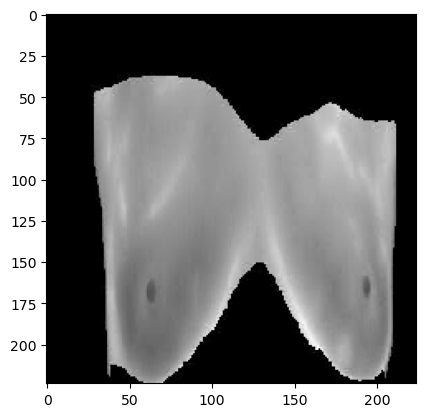

In [10]:
img = image.load_img("Breast Cancer Patients MRI's/validation/Healthy/S_66.jpg",target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Healthy"   
else:
      op="Cancer"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op)) 

1/1 [==============================] - 0s 24ms/step
[[0.4829932]]
THE UPLOADED IMAGE IS SUSPECTED AS: Healthy


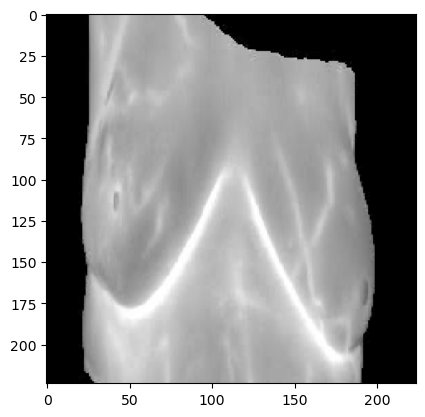

In [11]:
img = image.load_img("Breast Cancer Patients MRI's/validation/Sick/S_50.jpg",target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Healthy"   
else:
      op="Cancer"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op)) 

In [12]:
# converter = tf.lite.TFLiteConverter.from_saved_model(model)
# tflite_model = converter.convert()

In [13]:
# #if you want to save the TF Lite model use below steps or else skip
# tflite_model_files = pathlib.Path("Breast Cancer Patients MRI's/model.tflite")
# tflite_model_file.write_bytes(tflite_model)
# # Load TFLite model using interpreter and allocate tensors.
# interpreter = tf.lite.Interpreter(model_content=tflite_model)
# interpreter.allocate_tensors()